# Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df=pd.read_excel("/content/drive/MyDrive/alzahimer dataset.xlsx")

# First look at data

In [24]:
df.head()

,λ1,λ2,v',λd2,K,Ratio,total concentration,Diagnosis
0,0.299997,0.397389,48.578398,8.711975,1.000000,1.265415,0.931337,1
1,0.328178,0.021133,35.394534,17.861283,0.135463,0.225872,0.046037,1
2,0.257499,0.052942,1.709753,4.199340,0.014579,2.652811,0.779745,1
3,0.105291,0.091101,8.672848,11.759867,0.222355,1.299436,1.267304,1
4,0.240574,0.255997,1.374801,8.499183,0.237912,1.021160,0.335522,1


In [26]:
df.shape

(569, 8)

In [25]:
df.columns

Index(['λ1', 'λ2', ' v'', ' λd2', 'K', 'Ratio', 'total concentration',
       'Diagnosis'],
      dtype='object')

In [7]:
df.isna().sum().sum()

0

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   λ1                   569 non-null    float64
 2   λ2                   569 non-null    float64
 3    v'                  569 non-null    float64
 4    λd2                 569 non-null    float64
 5   K                    569 non-null    float64
 6   Ratio                569 non-null    float64
 7   total concentration  569 non-null    float64
 8   Diagnosis            569 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 40.1 KB


In [10]:
df.describe().style.background_gradient()

,Unnamed: 0,λ1,λ2,v',λd2,K,Ratio,total concentration,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,284.000000,0.129002,0.068627,14.424769,5.677398,0.147554,1.267785,1.026918,0.372583
std,164.400426,0.114033,0.092979,22.257436,4.728545,0.130932,1.180881,0.871157,0.483918
min,0.000000,0.000596,0.000213,0.010767,0.011005,0.000522,0.004655,0.004677,0.000000
25%,142.000000,0.057007,0.020889,4.385015,2.230459,0.053473,0.427121,0.365275,0.000000
50%,284.000000,0.106033,0.042321,10.177971,4.616174,0.114895,0.971372,0.830397,0.000000
75%,426.000000,0.159881,0.082943,18.232933,7.891118,0.199470,1.689322,1.438566,1.000000
max,568.000000,1.000000,1.000000,351.768090,32.534078,1.000000,6.687090,6.757358,1.000000


Text(0.5, 1.0, 'Heatmap')

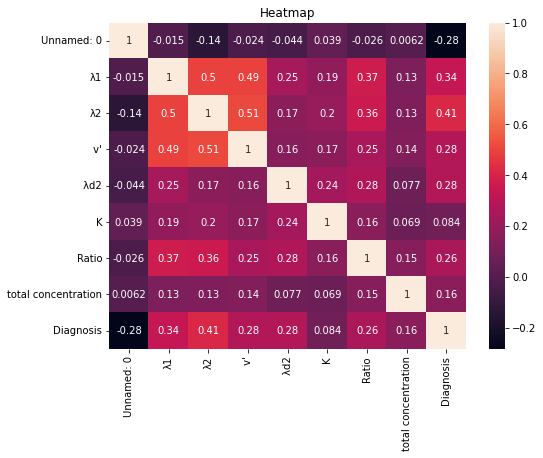

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap")

<ipython-input-12-3699fe69e7da>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 1.0, 'Heatmap')

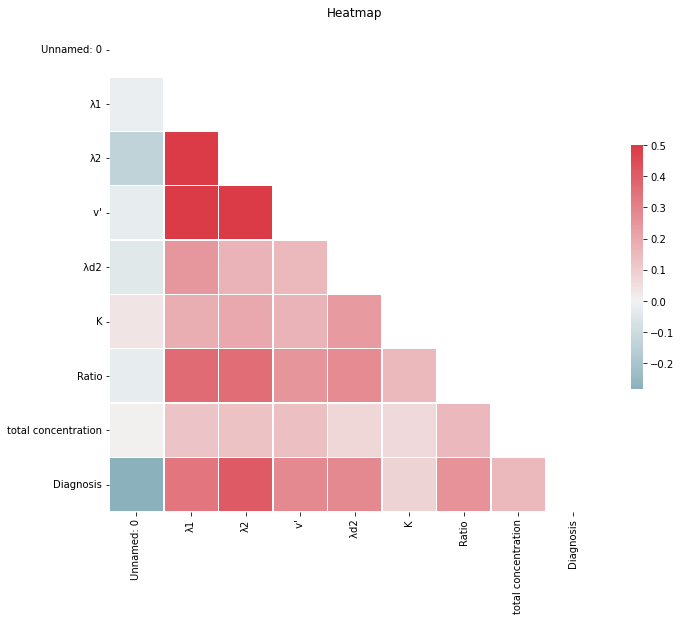

In [12]:
corr=df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Heatmap")

## KNN Model

In [13]:
x = df.drop(['Diagnosis'],axis=1)

y = df['Diagnosis']

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        67
           1       0.74      0.36      0.49        47

    accuracy                           0.68       114
   macro avg       0.70      0.64      0.63       114
weighted avg       0.70      0.68      0.65       114



## Descion Tree Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()

dt_model.fit(x_train,y_train)

y_pred=dt_model.predict(x_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        67
           1       0.76      0.68      0.72        47

    accuracy                           0.78       114
   macro avg       0.78      0.77      0.77       114
weighted avg       0.78      0.78      0.78       114

